# conf-1 of the NHRF data pipeline
In this notebook we analyze the results from run1, 2, 3, 4 of the conf-1 configuration of the NHRF data pipeline

In [57]:
import pandas as pd
from analysis_functions import get_time_periods, get_power_data, divide_power_data_into_step_periods, compute_relative_energy_usage
from analysis_functions import plot_energy_usage, plot_multiple_datasets, plot_energy_usage_overlay_multiple_datasets

In [86]:
base_path = "./data_carbontracker/conf-1"
corresponding_datasets = {
    "run1": {
        "simpipe": f"{base_path}/run1.dat", 
        "tapo": f'{base_path}/power-run1.xls',
        "tapo-filtered": f'{base_path}/power-run1-filtered.xls',
        "start_time_baseline": '2025-09-01 00:00:00', 
        "end_time_baseline": '2025-09-01 06:00:00',
        "start_time_pipeline": '2025-09-01 06:21:04',
        "end_time_pipeline": '2025-09-01 09:46:07'},
    "run2": {
        "simpipe": f"{base_path}/run2.dat", 
        "tapo": f'{base_path}/power-run2.xls',
        "tapo-filtered": f'{base_path}/power-run2-filtered.xls',
        "start_time_baseline": '2025-09-01 13:00:00', 
        "end_time_baseline": '2025-09-01 20:00:40',
        "start_time_pipeline": '2025-09-01 21:07:47',
        "end_time_pipeline": '2025-09-02 00:36:43'},
    "run3": {
        "simpipe": f"{base_path}/run3.dat", 
        "tapo": f'{base_path}/power-run3.xls',
        "tapo-filtered": f'{base_path}/power-run3-filtered.xls',
        "start_time_baseline": '2025-09-02 00:00:00', 
        "end_time_baseline": '2025-09-02 05:00:00',
        "start_time_pipeline": '2025-09-02 05:26:59',
        "end_time_pipeline": '2025-09-02 08:51:24'},
    "run4": {
        "simpipe": f"{base_path}/run4.dat", 
        "tapo": f'{base_path}/power-run4.xls', 
        "tapo-filtered": f'{base_path}/power-run4-filtered.xls',
        "start_time_baseline": '2025-09-02 00:00:00', 
        "end_time_baseline": '2025-09-02 09:00:00',
        "start_time_pipeline": '2025-09-02 09:43:04',
        "end_time_pipeline": '2025-09-02 13:07:24'},
}
# corresponding datasets tuples contain the following information: 
# (carbontracker_simpipe_data, tapo_data, start_time_baseline, end_time_baseline, end_time_pipeline)

In [87]:
# runNr = 1, 2, 3, 4 // corresponds to 0, 1, 2, 3 in the corresponding_datasets

#runNr = "run1"
#runNr = "run2"
#runNr = "run3"
runNr = "run4"
path = corresponding_datasets[runNr]["simpipe"]
carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)

/var/folders/9x/df97rq2j35gg_bpq8dzj7wz40000gn/T/ipykernel_60760/3193625479.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)


In [88]:
carbontracker_simpipe_data

,step,start,stop,duration,co2,energy,status,output
0,create-fasta-dict,2025-09-02T09:43:04Z,2025-09-02T09:44:11Z,67,0.009,0.000293,Succeeded,fasta-dict*
1,create-fasta-index,2025-09-02T09:44:20Z,2025-09-02T09:45:06Z,46,0.002,0.000051,Succeeded,fasta-index*
2,trimming,2025-09-02T09:45:16Z,2025-09-02T10:09:32Z,1456,1.274,0.042349,Succeeded,trimming-results*
3,alignment-bwa,2025-09-02T10:09:42Z,2025-09-02T12:34:06Z,8664,9.635,0.320308,Succeeded,alignment-results*
4,mark-duplicates,2025-09-02T12:34:16Z,2025-09-02T13:04:25Z,1809,0.681,0.022639,Succeeded,mark-duplicates-results*
5,base-quality-score,2025-09-02T13:04:35Z,2025-09-02T13:07:24Z,169,0.004,0.000138,Succeeded,final-results*


In [89]:
dt_format = '%Y-%m-%d %H:%M:%S'
for _, row in carbontracker_simpipe_data.iterrows():
    start_time = pd.to_datetime(row['start']).strftime(dt_format)
    stop_time = pd.to_datetime(row['stop']).strftime(dt_format)
    print(f"Step: {row['step']}, Start: {start_time}, Stop: {stop_time}")

Step: create-fasta-dict, Start: 2025-09-02 09:43:04, Stop: 2025-09-02 09:44:11
Step: create-fasta-index, Start: 2025-09-02 09:44:20, Stop: 2025-09-02 09:45:06
Step: trimming, Start: 2025-09-02 09:45:16, Stop: 2025-09-02 10:09:32
Step: alignment-bwa, Start: 2025-09-02 10:09:42, Stop: 2025-09-02 12:34:06
Step: mark-duplicates, Start: 2025-09-02 12:34:16, Stop: 2025-09-02 13:04:25
Step: base-quality-score, Start: 2025-09-02 13:04:35, Stop: 2025-09-02 13:07:24


In [95]:
power_data = get_power_data(data_path=corresponding_datasets[runNr]["tapo"]) # get tapo power data
#power_data = get_power_data(data_path=corresponding_datasets[runNr]["tapo-filtered"]) # get tapo power data

In [96]:
power_data.describe()

,Date,Power(W),Energy(kWh)
count,288,288.000000,288.000000
mean,2025-09-02 04:52:30,243.180556,0.020265
min,2025-09-01 16:55:00,199.000000,0.016583
25%,2025-09-01 22:53:45,203.000000,0.016917
50%,2025-09-02 04:52:30,208.000000,0.017333
75%,2025-09-02 10:51:15,316.000000,0.026333
max,2025-09-02 16:50:00,365.000000,0.030417
std,NaN,54.737340,0.004561


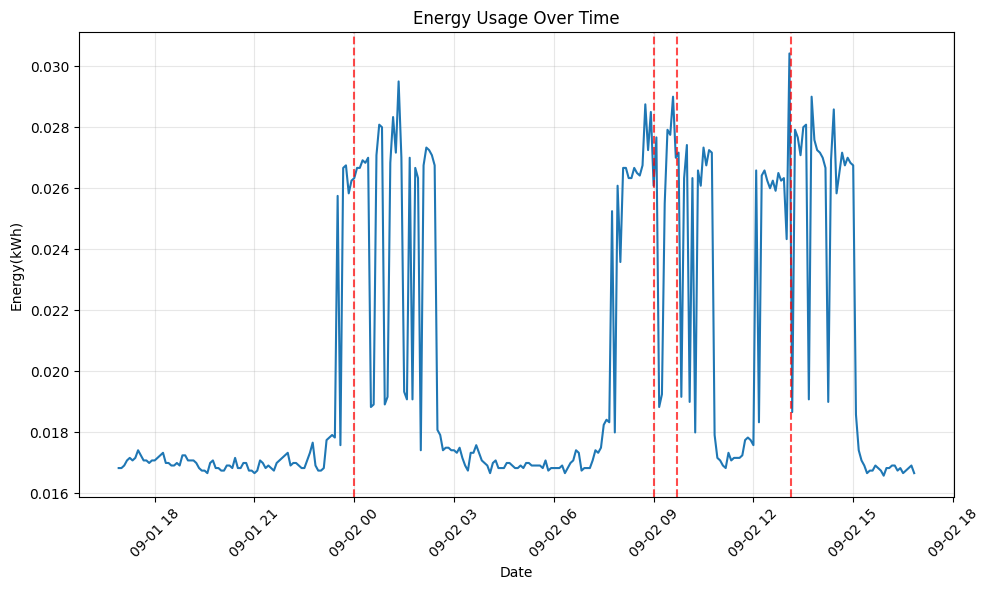

In [98]:
#raw_power_data.plot(x='Date', y='Energy(kWh)', title='Energy Usage Over Time')
#start_time = corresponding_datasets[runNr -1][2]
title = "Energy Usage Over Time"
xcol="Date"
ycol="Energy(kWh)"
start_time_baseline = corresponding_datasets[runNr]["start_time_baseline"]
end_time_baseline = corresponding_datasets[runNr]["end_time_baseline"]
start_time_pipeline = corresponding_datasets[runNr]["start_time_pipeline"]
end_time_pipeline = corresponding_datasets[runNr]["end_time_pipeline"]

timestamps = [start_time_baseline, end_time_baseline, start_time_pipeline, end_time_pipeline]

# run1 // (seems correct! - however power-data seems delayed)
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=start_time_baseline, end=None, timestamps=timestamps)

# run2 // (Seems correct! - however power-data seems delayed)
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=start_time_baseline, end=end_time_pipeline, timestamps=timestamps)

# run 3 // 
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=None, end=None, timestamps=timestamps)

# run 4 // 
plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=None, end=None, timestamps=timestamps)

In [9]:
time_periods = get_time_periods(carbontracker_simpipe_data, start_time_baseline, end_time_baseline)

In [10]:
time_periods

[('baseline', '2025-09-01 13:00:00', '2025-09-01 20:00:40'),
 ('create-fasta-index', '2025-09-01 21:07:47', '2025-09-01 21:08:30'),
 ('trimming', '2025-09-01 21:08:40', '2025-09-01 21:32:40'),
 ('alignment-bwa', '2025-09-01 21:32:50', '2025-09-01 23:56:43'),
 ('create-fasta-dict', '2025-09-01 23:56:53', '2025-09-02 00:03:31'),
 ('mark-duplicates', '2025-09-02 00:03:41', '2025-09-02 00:33:53'),
 ('base-quality-score', '2025-09-02 00:34:03', '2025-09-02 00:36:43')]

In [11]:
power_data_segments = divide_power_data_into_step_periods(time_periods, power_data)

Processing baseline...
    start: 2025-09-01 13:00:00, end: 2025-09-01 20:00:40
Processing create-fasta-index...
    start: 2025-09-01 21:07:47, end: 2025-09-01 21:08:30
No data found between 2025-09-01 21:07:47 and 2025-09-01 21:08:30
    Warning! No data for period: create-fasta-index
Processing trimming...
    start: 2025-09-01 21:08:40, end: 2025-09-01 21:32:40
Processing alignment-bwa...
    start: 2025-09-01 21:32:50, end: 2025-09-01 23:56:43
Processing create-fasta-dict...
    start: 2025-09-01 23:56:53, end: 2025-09-02 00:03:31
Processing mark-duplicates...
    start: 2025-09-02 00:03:41, end: 2025-09-02 00:33:53
Processing base-quality-score...
    start: 2025-09-02 00:34:03, end: 2025-09-02 00:36:43
Last segment detected.
    Last segment contains data.


/Users/gorans/Documents/Gnuplot/carbontracker/mainframe/analysis_functions.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '149.06333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stats['filtered_data'].loc[stats['filtered_data']['Date'].idxmax(), 'Power(W)'] *= fraction


In [12]:
power_data_segments

[                   Date  Power(W)  Energy(kWh)
 68  2025-09-01 13:00:00       201     0.016750
 69  2025-09-01 13:05:00       200     0.016667
 70  2025-09-01 13:10:00       203     0.016917
 71  2025-09-01 13:15:00       203     0.016917
 72  2025-09-01 13:20:00       201     0.016750
 ..                  ...       ...          ...
 148 2025-09-01 19:40:00       204     0.017000
 149 2025-09-01 19:45:00       205     0.017083
 150 2025-09-01 19:50:00       202     0.016833
 151 2025-09-01 19:55:00       202     0.016833
 152 2025-09-01 20:00:00       201     0.016750
 
 [85 rows x 3 columns],
 Empty DataFrame
 Columns: []
 Index: [],
                    Date  Power(W)  Energy(kWh)
 166 2025-09-01 21:10:00       205     0.017083
 167 2025-09-01 21:15:00       204     0.017000
 168 2025-09-01 21:20:00       202     0.016833
 169 2025-09-01 21:25:00       203     0.016917
 170 2025-09-01 21:30:00       202     0.016833,
                    Date  Power(W)  Energy(kWh)
 171 2025-09-01 21:

In [13]:
#plot_energy_usage_overlay_multiple_datasets(power_data, power_data_segments, time_periods, start_time_baseline, end_time)

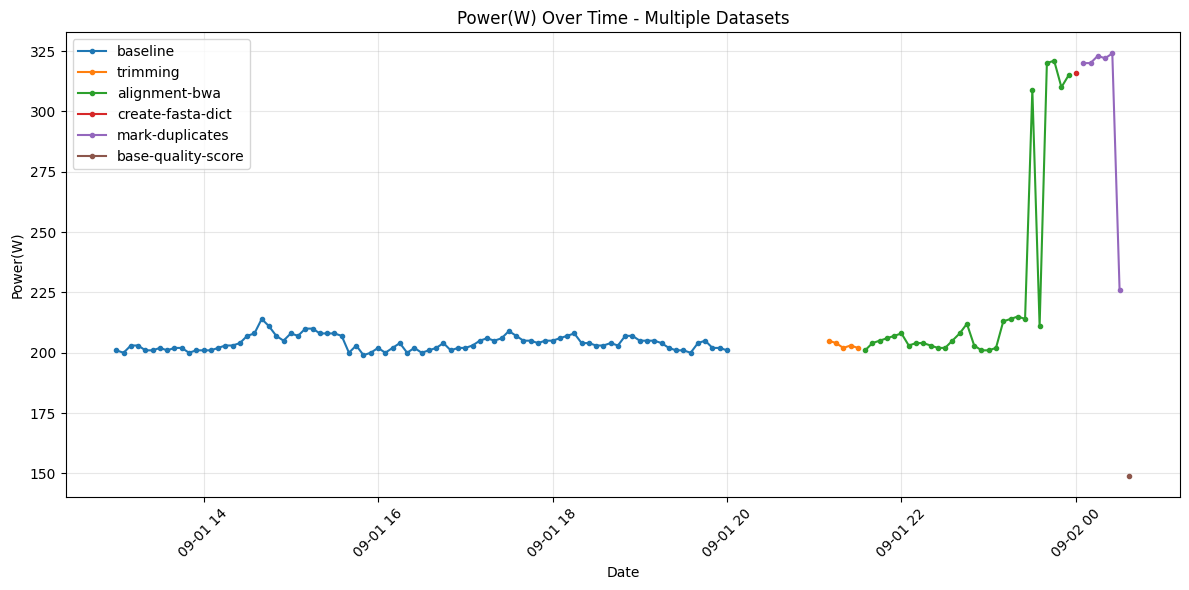

In [14]:
plot_multiple_datasets(power_data_segments, time_periods)

The BSQR step is not in the plot becaus there is no datapoint for it in the tapo power data.

However, we do attribute a contribution to it here, in the power_data_segments, which is the fractional contribution of the data point after the BSQR step.

This is coded/computed in the function divide_power_data_into_step_periods(). 

# Compute the total energy of the pipeline for the Tapo power data and compare with the carbontracker data
To compute the total energy of the pipeline for the Tapo data, we compute the average energy for the baseline and subtract this value from each energy value in the dataset, then compute the sum of the energy in the pipeline duration.

In [15]:
outdf, baseline_energy, total_energy = compute_relative_energy_usage(power_data_segments, time_periods)

    Processing segment 1
    Warning! Empty segment 1
    Processing segment 2
    Step: trimming
    Processing segment 3
    Step: alignment-bwa
    Processing segment 4
    Step: create-fasta-dict
    Processing segment 5
    Step: mark-duplicates
    Processing segment 6
    Step: base-quality-score
Total energy consumption (kWh): 0.10629253267973868


/Users/gorans/Documents/Gnuplot/carbontracker/mainframe/analysis_functions.py:407: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outdf = pd.concat([outdf, new_row], ignore_index=True)


NameError: name 'simpipe_data' is not defined